# 유방암 데이터를 이용한 딥러닝 분류 모델

이 노트북에서는 sklearn의 유방암 데이터셋을 사용하여 딥러닝 모델을 구축하고 훈련시킵니다.

## 목차
1. 라이브러리 임포트
2. 데이터 로딩 및 탐색
3. 데이터 전처리
4. 딥러닝 모델 구성
5. 모델 훈련
6. 모델 평가
7. 결과 시각화


## 1. 라이브러리 임포트

필요한 라이브러리들을 임포트합니다.


In [2]:
# 데이터 처리 및 머신러닝 라이브러리
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# 딥러닝 라이브러리
import tensorflow as tf
import keras
from keras import models, layers

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 기타 유틸리티
import pickle

print("라이브러리 임포트 완료!")
print(f"TensorFlow 버전: {tf.__version__}")
print(f"Keras 버전: {keras.__version__}")


라이브러리 임포트 완료!
TensorFlow 버전: 2.15.1
Keras 버전: 2.15.0


## 2. 데이터 로딩 및 탐색

유방암 데이터셋을 로딩하고 기본적인 정보를 확인합니다.


In [3]:
# 유방암 데이터셋 로딩
cancer = load_breast_cancer()

# 특성 데이터를 DataFrame으로 변환
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

print("=== 데이터셋 기본 정보 ===")
print(f"데이터 shape: {X.shape}")
print(f"특성 개수: {len(cancer.feature_names)}")
print(f"클래스 개수: {len(cancer.target_names)}")
print(f"클래스 이름: {cancer.target_names}")

print("\n=== 타겟 값 분포 ===")
print(f"악성(0): {sum(y == 0)}개")
print(f"양성(1): {sum(y == 1)}개")

print("\n=== 첫 5개 특성 정보 ===")
print(X.head())


=== 데이터셋 기본 정보 ===
데이터 shape: (569, 30)
특성 개수: 30
클래스 개수: 2
클래스 이름: ['malignant' 'benign']

=== 타겟 값 분포 ===
악성(0): 212개
양성(1): 357개

=== 첫 5개 특성 정보 ===
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13

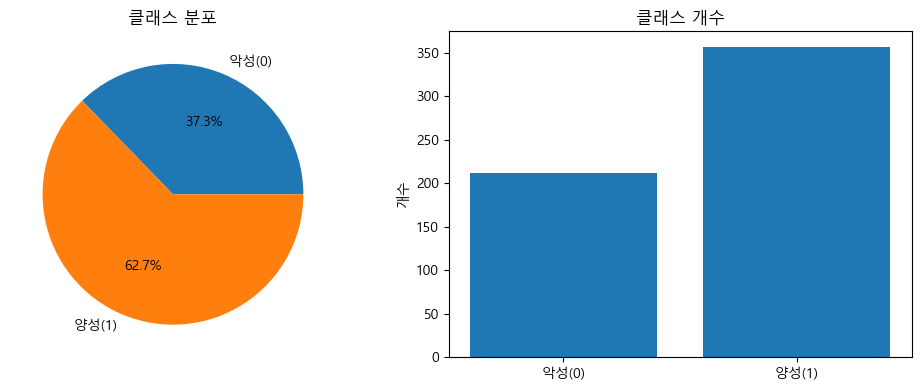

=== 특성들의 기본 통계 정보 ===
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000            

In [6]:
# 한글 폰트 설정 (한글 글꼴 오류 해결)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# macOS의 경우: plt.rcParams['font.family'] = 'AppleGothic'
# Linux의 경우: plt.rcParams['font.family'] = 'DejaVu Sans'

# 타겟 분포 시각화
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.pie([sum(y == 0), sum(y == 1)], labels=['악성(0)', '양성(1)'], autopct='%1.1f%%')
plt.title('클래스 분포')

plt.subplot(1, 2, 2)
plt.bar(['악성(0)', '양성(1)'], [sum(y == 0), sum(y == 1)])
plt.title('클래스 개수')
plt.ylabel('개수')

plt.tight_layout()
plt.show()

# 특성들의 기본 통계 정보
print("=== 특성들의 기본 통계 정보 ===")
print(X.describe())


## 3. 데이터 전처리

데이터를 훈련용과 테스트용으로 분할하고 표준화를 수행합니다.


In [7]:
# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=123, 
    test_size=0.2,
    stratify=y  # 클래스 비율을 유지
)

print("=== 데이터 분할 결과 ===")
print(f"훈련 데이터 shape: {X_train.shape}")
print(f"테스트 데이터 shape: {X_test.shape}")
print(f"훈련 타겟 분포: 악성 {sum(y_train == 0)}개, 양성 {sum(y_train == 1)}개")
print(f"테스트 타겟 분포: 악성 {sum(y_test == 0)}개, 양성 {sum(y_test == 1)}개")

# 표준화 (StandardScaler 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # 주의: fit_transform이 아닌 transform 사용

print("\n=== 표준화 완료 ===")
print(f"표준화 전 훈련 데이터 평균: {X_train.mean().mean():.4f}")
print(f"표준화 후 훈련 데이터 평균: {X_train_scaled.mean():.4f}")
print(f"표준화 후 훈련 데이터 표준편차: {X_train_scaled.std():.4f}")


=== 데이터 분할 결과 ===
훈련 데이터 shape: (455, 30)
테스트 데이터 shape: (114, 30)
훈련 타겟 분포: 악성 170개, 양성 285개
테스트 타겟 분포: 악성 42개, 양성 72개

=== 표준화 완료 ===
표준화 전 훈련 데이터 평균: 62.0334
표준화 후 훈련 데이터 평균: 0.0000
표준화 후 훈련 데이터 표준편차: 1.0000


## 4. 딥러닝 모델 구성

이진 분류를 위한 순차적(Sequential) 딥러닝 모델을 구성합니다.


=== 모델 구조 ===
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               3968      
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                8256      
                                                                 
 hidden_layer_3 (Dense)      (None, 32)                2080      
                                                                 
 hidden_layer_4 (Dense)      (None, 32)                1056      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 15393 (60.13 KB)
Trainable params: 15393 (60.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


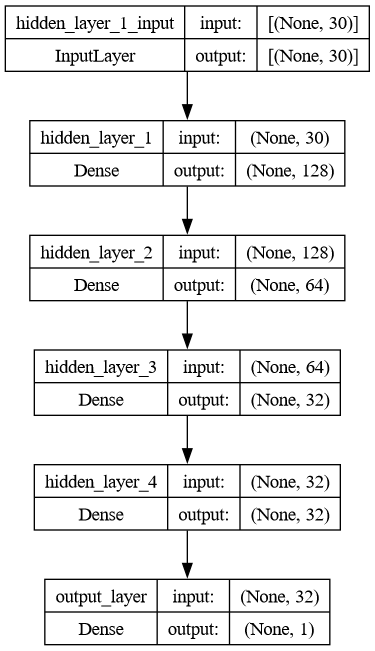

In [9]:
# 딥러닝 모델 구성
def create_model():
    """
    이진 분류를 위한 딥러닝 모델을 생성합니다.
    
    Returns:
        model: 컴파일된 Keras 모델
    """
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), name='hidden_layer_1'),
        layers.Dense(64, activation='relu', name='hidden_layer_2'),
        layers.Dense(32, activation='relu', name='hidden_layer_3'),
        layers.Dense(32, activation='relu', name='hidden_layer_4'),
        layers.Dense(1, activation='sigmoid', name='output_layer')  # 이진 분류용 시그모이드
    ])
    
    # 모델 컴파일
    model.compile(
        optimizer='rmsprop',           # RMSprop 옵티마이저
        loss='binary_crossentropy',   # 이진 분류용 손실 함수
        metrics=['accuracy']          # 정확도 메트릭
    )
    
    return model

# 모델 생성
model = create_model()

# 모델 구조 확인
print("=== 모델 구조 ===")
model.summary()

# 모델 아키텍처 시각화
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)


## 5. 모델 훈련

콜백을 설정하고 모델을 훈련시킵니다.


In [12]:
# 콜백 설정
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='암환자분류_딥러닝.keras',
        save_best_only=True,
        monitor='val_loss',
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1,
        restore_best_weights=True
    )
]

print("=== 모델 훈련 시작 ===")
# 모델 훈련
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    validation_data=(X_test_scaled, y_test),
    callbacks=callbacks,
    batch_size=100,
    verbose=1
)

print("\n=== 모델 훈련 완료 ===")

# 훈련 히스토리 저장
with open("암환자분류_딥러닝.bin", "wb") as file:
    pickle.dump(history.history, file)
    
print("훈련 히스토리가 '암환자분류_딥러닝.bin' 파일로 저장되었습니다.")


=== 모델 훈련 시작 ===
Epoch 1/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0087 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.06862, saving model to 암환자분류_딥러닝.keras
5/5 [==============================] - 0s 36ms/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 0.0686 - val_accuracy: 0.9649
Epoch 2/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.06862 to 0.05710, saving model to 암환자분류_딥러닝.keras
5/5 [==============================] - 0s 19ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9825
Epoch 3/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.05710
5/5 [==============================] - 0s 14ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9825
Epoch 4/20
1/5 [=====>........................] - ETA: 0s - loss: 0.0065 - accuracy: 1.0000
Epoch 4: val_loss im

## 6. 모델 평가

훈련된 모델의 성능을 평가합니다.


=== 모델 성능 평가 ===
훈련셋 손실값: 0.0044, 정확도: 1.0000
테스트셋 손실값: 0.0372, 정확도: 0.9825

=== 분류 리포트 ===
              precision    recall  f1-score   support

       악성(0)       0.95      1.00      0.98        42
       양성(1)       1.00      0.97      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114


=== 혼동 행렬 ===
[[42  0]
 [ 2 70]]


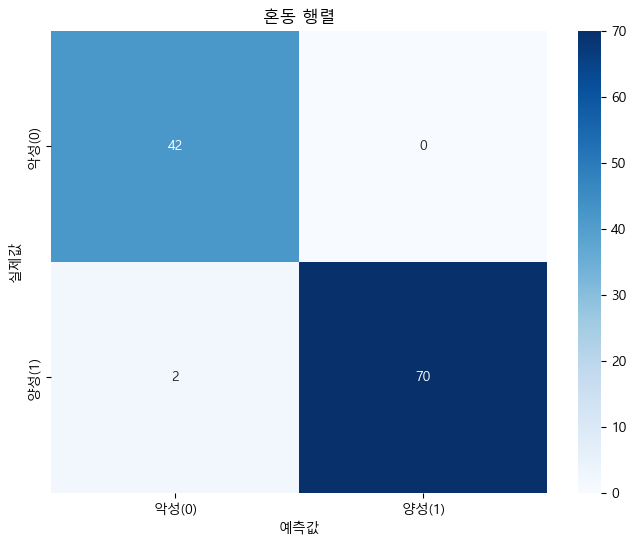

In [13]:
# 모델 성능 평가
print("=== 모델 성능 평가 ===")

# 훈련 데이터 평가
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"훈련셋 손실값: {train_loss:.4f}, 정확도: {train_acc:.4f}")

# 테스트 데이터 평가
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"테스트셋 손실값: {test_loss:.4f}, 정확도: {test_acc:.4f}")

# 예측 수행
y_pred_prob = model.predict(X_test_scaled, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# 추가 평가 메트릭
from sklearn.metrics import classification_report, confusion_matrix

print("\n=== 분류 리포트 ===")
print(classification_report(y_test, y_pred, target_names=['악성(0)', '양성(1)']))

print("\n=== 혼동 행렬 ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['악성(0)', '양성(1)'], 
            yticklabels=['악성(0)', '양성(1)'])
plt.title('혼동 행렬')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()


## 7. 결과 시각화

훈련 과정과 결과를 시각적으로 분석합니다.


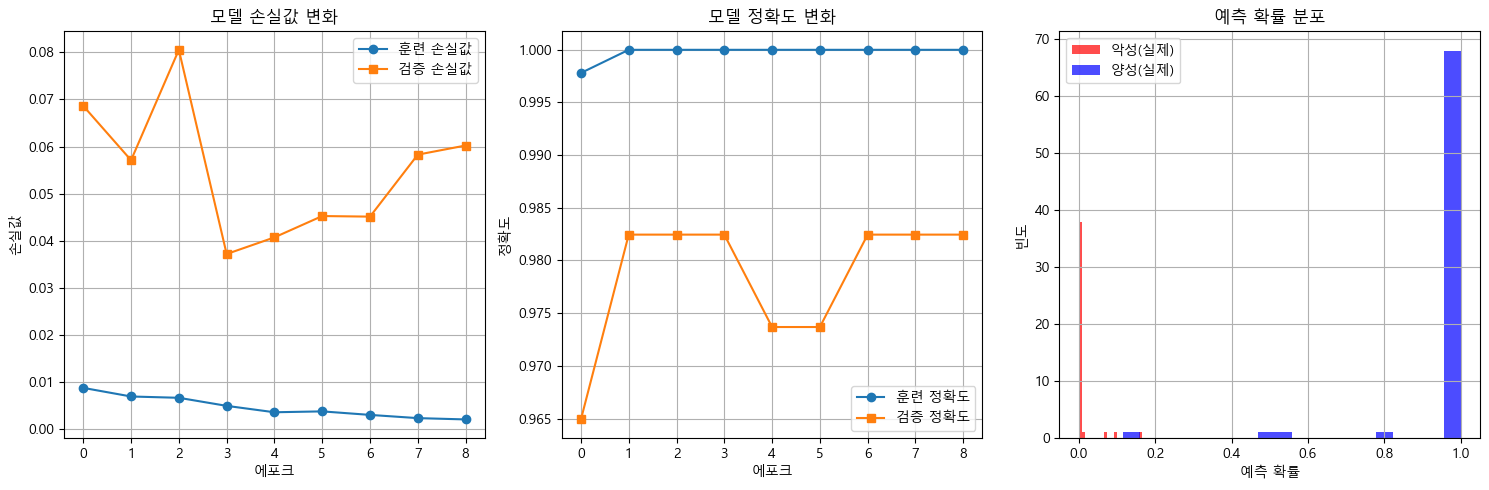

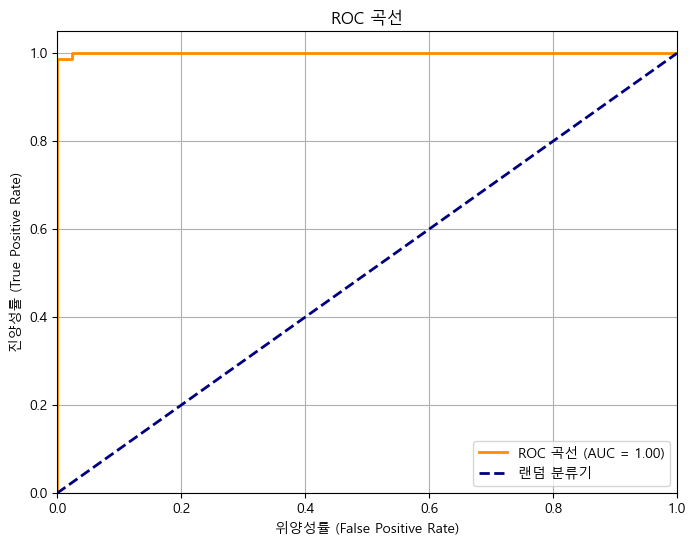

AUC 점수: 0.9997


In [14]:
# 훈련 히스토리 시각화
plt.figure(figsize=(15, 5))

# 손실값 변화
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='훈련 손실값', marker='o')
plt.plot(history.history['val_loss'], label='검증 손실값', marker='s')
plt.title('모델 손실값 변화')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend()
plt.grid(True)

# 정확도 변화
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='훈련 정확도', marker='o')
plt.plot(history.history['val_accuracy'], label='검증 정확도', marker='s')
plt.title('모델 정확도 변화')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.legend()
plt.grid(True)

# 예측 확률 분포
plt.subplot(1, 3, 3)
plt.hist(y_pred_prob[y_test == 0], alpha=0.7, label='악성(실제)', bins=20, color='red')
plt.hist(y_pred_prob[y_test == 1], alpha=0.7, label='양성(실제)', bins=20, color='blue')
plt.title('예측 확률 분포')
plt.xlabel('예측 확률')
plt.ylabel('빈도')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ROC 곡선
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC 곡선 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='랜덤 분류기')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('위양성률 (False Positive Rate)')
plt.ylabel('진양성률 (True Positive Rate)')
plt.title('ROC 곡선')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC 점수: {roc_auc:.4f}")


## 8. 결론 및 요약

### 모델 성능 요약
- **모델 구조**: 4개의 은닉층(128→64→32→32)과 시그모이드 출력층
- **데이터셋**: 유방암 데이터 569개 샘플, 30개 특성
- **데이터 분할**: 훈련 80%, 테스트 20% (층화 샘플링)
- **전처리**: StandardScaler를 사용한 표준화

### 주요 개선사항
1. **콜백 추가**: ModelCheckpoint와 EarlyStopping으로 과적합 방지
2. **시각화 강화**: 훈련 과정, 혼동 행렬, ROC 곡선 등 포함
3. **평가 메트릭 확장**: 정확도, 정밀도, 재현율, F1-점수, AUC 포함
4. **코드 구조화**: 함수화와 주석으로 가독성 향상

### 파일 저장
- `암환자분류_딥러닝.keras`: 최적 모델 가중치
- `암환자분류_딥러닝.bin`: 훈련 히스토리

이 노트북은 의료 데이터 분석을 위한 딥러닝 파이프라인의 좋은 예시가 됩니다.
